In [70]:
import pandas as pd

vgg16_df = pd.read_csv('/Users/flatironschool/Final-Project/final-project/image_names_preds_vgg16_df')

In [72]:
vgg16_df = vgg16_df.drop(columns=['Unnamed: 0'])

In [134]:
vgg16_df.head()

,0,1
0,SOLD-SancheSeaChange3_22x30SOLD.jpg,0
1,UNSOLD-MaffiaSalt1_27x35.JPG,0
2,SOLD-JosetteUrsoJELLOsold1.jpg,0
3,SOLD-FoxHearHearGraphitePaper9_25x18_75SOLD.JPG,0
4,SOLD-HamlinPortal30x30SOLD.jpg,1


In [77]:
preds_pca = pd.read_csv('/Users/flatironschool/Final-Project/final-project/image_names_preds_pca_df')

In [78]:
preds_pca = preds_pca.drop(columns=['Unnamed: 0'])

In [135]:
preds_pca.head()

,0,1
0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,0
1,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,1
2,UNSOLD-NeillDEW20x20.jpg,1
3,SOLD-IMG_4084.jpg,1
4,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,0


In [74]:
preds_no_pca = pd.read_csv('/Users/flatironschool/Final-Project/final-project/image_names_preds_no_pca_df')

In [75]:
preds_no_pca = preds_no_pca.drop(columns=['Unnamed: 0'])

In [136]:
preds_no_pca.head()

,0,1
0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,1
1,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,0
2,UNSOLD-NeillDEW20x20.jpg,0
3,SOLD-IMG_4084.jpg,0
4,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,1


In [735]:
sold_df = pd.read_csv('/Users/flatironschool/Final-Project/final-project/cleaned-joined-df-SOLD')

In [736]:
sold_df = sold_df.drop(columns=['Unnamed: 0'])

In [737]:
len(sold_df)

1723

In [ ]:
# 1. Match up images with images from sold df
# 2. Build unsold df
# 3. Match up images with images from unsold df
# 4. Manually add items that didn't get in the scrape from sold and unsold
# 5. Combine sold & unsold dfs
# 6. Add more columns to final df
# 7. Run classification model

In [93]:
sold_df.head()

,Artist,Dimensions,Media,Title,Date Sold
0,Michiyo Ihara,"10.25 x 10.25 inches (unframed), 11.57 x 11.57...",graphite on paper (hand-drawn),Snowflakes #117,10/04/2016
1,Jessica McCambly,"7 x 7 inches (unframed), 10.5 x 10.5 inches (f...","acrylic, mica, polymer on paper",Subsurface 2,10/04/2016
2,Jessica McCambly,"7 x 7 inches (unframed), 10.5 x 10.5 inches (f...","acrylic, mica, polymer on paper",Subsurface 8,10/04/2016
3,Eve Stockton,"36 x 36 inches (unframed), 41.25 x 41.25 inche...",woodcut print with colored and metallic inks o...,Sea/Bloom variation 7,10/04/2016
4,Charles Clary,7.5 x 4.25 x 1 inches,hand-cut paper and VHS cover,Edward Scissorhands,09/21/2016


In [94]:
len(sold_df)

1723

In [83]:
import os

file_names = []

for file in os.listdir('/Users/flatironschool/Final-Project/All-Images'):
    file_names.append(file)

In [84]:
file_names

['SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg',
 'SOLD-StocktWoodlandLandscapeVIIIDiptych6WoodcutPrintPaperDibond36x72SOLD.jpeg',
 'UNSOLD-NeillDEW20x20.jpg',
 'SOLD-IMG_4084.jpg',
 'SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg',
 'SOLD-MorejoThriftSeaPink10x10HRSOLD.JPG',
 'UNSOLD-CollinBlacktop32x44.jpg',
 'SOLD-MoriarCairn2012Encaustic6x7_5x11_25SOLD.jpg',
 'SOLD-CChongDeerFriendSOLD.jpg',
 'SOLD-MorejoDullOregonGrapePinking10x10SOLD.JPG',
 'SOLD-KonigsStepAtDuskOilCanvas24x35SOLD.jpg',
 'SOLD-CollinPointsofDeparture44x32HR_SOLD.jpg',
 'SOLD-JudgeLakeMichiganSeries30x30SOLD.jpg',
 'SOLD-ParisiVernalEfflorescence20x40HRSOLD.jpg',
 'SOLD-GlessnImpossibleUnicorn8x8x1SOLD.jpg',
 'SOLD-MoriarScholar1_66x38SOLD.jpg',
 'SOLD-PFried_Circles17_2012_OilOnCanvas_40x40_4000SOLD.JPG',
 'UNSOLD-GrossVSH4_2014_64x32-copy.jpg',
 'SOLD-Hiller_SetMinus_20x60x2SOLD.jpg',
 'UNSOLD-JFintz_3_4_5_Turnabout#1AcrylicCanvas54x60in_2007.jpg',
 'SOLD-NeillPace260x60sold.jpg',
 'SOLD-NeillAPPRAISAL40x36SOLD.jpg',
 'SOLD-

In [85]:
len(file_names)

1286

In [ ]:
# Images not in clustering labels for some reason or another

# SOLD-aircover-M.Lanzetta.psd
# SOLD-KonigsMonotype1.pictClipping

In [353]:
# pd.concat([vgg16_df, preds_pca, preds_no_pca])

clusters_df = vgg16_df.join(preds_pca, rsuffix='-preds_pca', how='right')

In [354]:
clusters_df = clusters_df.join(preds_no_pca, rsuffix='-preds_no_pca', how='right')

In [355]:
clusters_df = clusters_df.rename(columns = {clusters_df.columns[0]: 'vgg16'})


In [356]:
len(clusters_df)

1283

In [349]:
clusters_df

,vgg16,1,0-preds_pca,1-preds_pca,0-preds_no_pca,1-preds_no_pca
0,SOLD-SancheSeaChange3_22x30SOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,1
1,UNSOLD-MaffiaSalt1_27x35.JPG,0,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,1,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,0
2,SOLD-JosetteUrsoJELLOsold1.jpg,0,UNSOLD-NeillDEW20x20.jpg,1,UNSOLD-NeillDEW20x20.jpg,0
3,SOLD-FoxHearHearGraphitePaper9_25x18_75SOLD.JPG,0,SOLD-IMG_4084.jpg,1,SOLD-IMG_4084.jpg,0
4,SOLD-HamlinPortal30x30SOLD.jpg,1,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,0,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,1
5,SOLD-IharaSnowflakes104Link2013GraphitePaper10...,0,SOLD-MorejoThriftSeaPink10x10HRSOLD.JPG,0,SOLD-MorejoThriftSeaPink10x10HRSOLD.JPG,1
6,SOLD-JudgeMapleEditionGreen24x24SOLD.jpg,1,UNSOLD-CollinBlacktop32x44.jpg,1,UNSOLD-CollinBlacktop32x44.jpg,0
7,SOLD-McCamHS-CV-6GreenCurvedStripes10x10SOLD.jpg,0,SOLD-MoriarCairn2012Encaustic6x7_5x11_25SOLD.jpg,0,SOLD-MoriarCairn2012Encaustic6x7_5x11_25SOLD.jpg,1
8,SOLD-IharaSnowflakes118_10_25x10_25SOLD.jpeg,1,SOLD-CChongDeerFriendSOLD.jpg,0,SOLD-CChongDeerFriendSOLD.jpg,1
9,SOLD-McCamShatter17_2013AcrylicGlassPaper30x30...,0,SOLD-MorejoDullOregonGrapePinking10x10SOLD.JPG,0,SOLD-MorejoDullOregonGrapePinking10x10SOLD.JPG,1


In [350]:
clusters_df.columns

Index(['vgg16', '1', '0-preds_pca', '1-preds_pca', '0-preds_no_pca',
       '1-preds_no_pca'],
      dtype='object')

In [357]:
clusters_df['1'].rename(columns=['vgg-preds'])


clusters_df = clusters_df.rename(columns={'vgg16': 'vgg16-file-names', '1': 'vgg-preds', '0-preds_pca': 'pca-file-names', '1-preds_pca': 'pca_preds', '0-preds_no_pca': 'no-pca-file-names', '1-preds_no_pca': 'no-pca-preds'})

In [358]:
clusters_df

,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds
0,SOLD-SancheSeaChange3_22x30SOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,1
1,UNSOLD-MaffiaSalt1_27x35.JPG,0,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,1,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,0
2,SOLD-JosetteUrsoJELLOsold1.jpg,0,UNSOLD-NeillDEW20x20.jpg,1,UNSOLD-NeillDEW20x20.jpg,0
3,SOLD-FoxHearHearGraphitePaper9_25x18_75SOLD.JPG,0,SOLD-IMG_4084.jpg,1,SOLD-IMG_4084.jpg,0
4,SOLD-HamlinPortal30x30SOLD.jpg,1,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,0,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,1
5,SOLD-IharaSnowflakes104Link2013GraphitePaper10...,0,SOLD-MorejoThriftSeaPink10x10HRSOLD.JPG,0,SOLD-MorejoThriftSeaPink10x10HRSOLD.JPG,1
6,SOLD-JudgeMapleEditionGreen24x24SOLD.jpg,1,UNSOLD-CollinBlacktop32x44.jpg,1,UNSOLD-CollinBlacktop32x44.jpg,0
7,SOLD-McCamHS-CV-6GreenCurvedStripes10x10SOLD.jpg,0,SOLD-MoriarCairn2012Encaustic6x7_5x11_25SOLD.jpg,0,SOLD-MoriarCairn2012Encaustic6x7_5x11_25SOLD.jpg,1
8,SOLD-IharaSnowflakes118_10_25x10_25SOLD.jpeg,1,SOLD-CChongDeerFriendSOLD.jpg,0,SOLD-CChongDeerFriendSOLD.jpg,1
9,SOLD-McCamShatter17_2013AcrylicGlassPaper30x30...,0,SOLD-MorejoDullOregonGrapePinking10x10SOLD.JPG,0,SOLD-MorejoDullOregonGrapePinking10x10SOLD.JPG,1


In [359]:
# test = clusters_df[['vgg16-file-names', 'vgg-preds']]

# test.sort_values(['vgg-preds'], ascending=[False])

In [109]:
# preds_df = clusters_df[['vgg-preds', 'preds_pca', 'preds-no-pca']]

In [360]:
# preds_df

In [361]:
# similarities = []

# for i,row in preds_df.iterrows():
#     if row['vgg-preds'] == row['preds-no-pca']:
#         similarities.append((i, row))
        
# the non-pca-ed classes and the vgg classes share a bunch of similarities, but the pca-preds v. no-pca-preds don't!

In [362]:
# len(similarities) / len(preds_df) # 51% of my images were clustered similarly between my vgg and my non-pca-preds! awesome

# Inspecting the images from each model to see what they clustered on

In [342]:
def show_images_and_cluster(start_index, stop_index, file_names_col, preds_col):
    plt.figure(figsize=(15,20))
    
    for i, val in enumerate(list(range(start_index,stop_index+1))):
        ax = plt.subplot(5,5, i+1)
        path = '/Users/flatironschool/Final-Project/All-Images/'
        file = mpimg.imread(path + clusters_df[file_names_col][val])
        imgplot = plt.imshow(file)
        plt.tight_layout()
        cluster = clusters_df[preds_col][val]
        plt.title(f'Cluster for this image is: {cluster}')
   

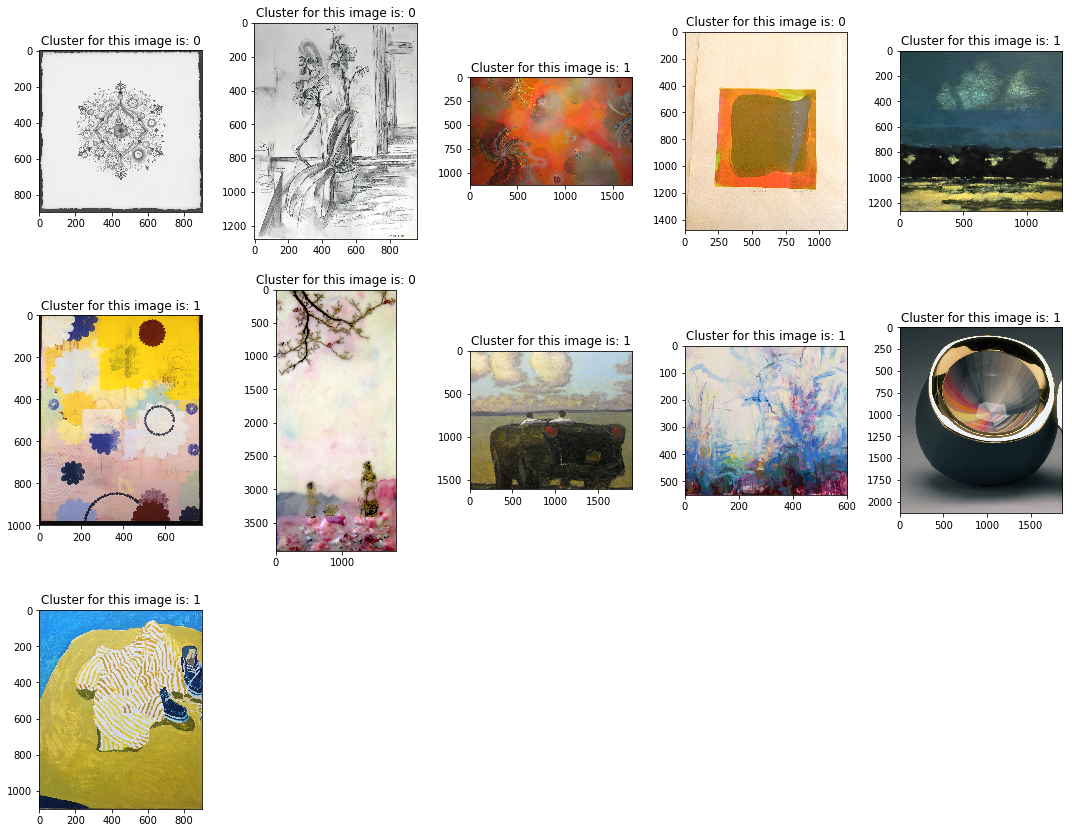

In [366]:
show_images_and_cluster(100, 110, 'pca-file-names', 'pca_preds')


# Joining clusters df with metadata df for sold works, based on file name and art work title

In [508]:
clusters_df.head()

,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds
0,SOLD-SancheSeaChange3_22x30SOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,0,SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg,1
1,UNSOLD-MaffiaSalt1_27x35.JPG,0,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,1,SOLD-StocktWoodlandLandscapeVIIIDiptych6Woodcu...,0
2,SOLD-JosetteUrsoJELLOsold1.jpg,0,UNSOLD-NeillDEW20x20.jpg,1,UNSOLD-NeillDEW20x20.jpg,0
3,SOLD-FoxHearHearGraphitePaper9_25x18_75SOLD.JPG,0,SOLD-IMG_4084.jpg,1,SOLD-IMG_4084.jpg,0
4,SOLD-HamlinPortal30x30SOLD.jpg,1,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,0,SOLD-BattenIndigoAirM1_30x40SMSOLD.jpg,1


In [509]:
sold_df.head()

,Artist,Dimensions,Media,Title,Date Sold
0,Michiyo Ihara,"10.25 x 10.25 inches (unframed), 11.57 x 11.57...",graphite on paper (hand-drawn),Snowflakes #117,10/04/2016
1,Jessica McCambly,"7 x 7 inches (unframed), 10.5 x 10.5 inches (f...","acrylic, mica, polymer on paper",Subsurface 2,10/04/2016
2,Jessica McCambly,"7 x 7 inches (unframed), 10.5 x 10.5 inches (f...","acrylic, mica, polymer on paper",Subsurface 8,10/04/2016
3,Eve Stockton,"36 x 36 inches (unframed), 41.25 x 41.25 inche...",woodcut print with colored and metallic inks o...,Sea/Bloom variation 7,10/04/2016
4,Charles Clary,7.5 x 4.25 x 1 inches,hand-cut paper and VHS cover,Edward Scissorhands,09/21/2016


In [977]:
sold_works_mapping_df = pd.read_csv('/Users/flatironschool/Final-Project/sold-works-mapping.csv')


In [978]:
sold_works_mapping_df.head()

,File Name,Artist,Title
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots)
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)"
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005
4,SOLD-WhiteGraphMandala004_12x12SOLD,Eleanor White,Graph Mandala 004 (blue center glass bead dots)


In [979]:
vgg = clusters_df[['vgg16-file-names', 'vgg-preds']]

In [987]:
sold_works_mapping_df = sold_works_mapping_df.merge(vgg, how='left', left_on ='File Name', right_on='vgg16-file-names' )

In [988]:
sold_works_mapping_df.head()

,File Name,Artist,Title,vgg16-file-names,vgg-preds
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0
4,SOLD-WhiteGraphMandala004_12x12SOLD,Eleanor White,Graph Mandala 004 (blue center glass bead dots),NaN,NaN


In [992]:
pca_df = clusters_df[['pca-file-names', 'pca_preds']]

In [995]:
sold_works_mapping_df = sold_works_mapping_df.merge(pca_df, how='left', left_on ='File Name', right_on='pca-file-names' )

In [997]:
no_pca_df = clusters_df[['no-pca-file-names', 'no-pca-preds']]

In [1000]:
sold_works_mapping_df = sold_works_mapping_df.merge(no_pca_df, how='left', left_on ='File Name', right_on='no-pca-file-names' )

In [1005]:
len(sold_works_mapping_df.dropna())

670

In [1006]:
len(sold_works_mapping_df.merge(sold_df, how='left', left_on =['Artist', 'Title'], right_on=['Artist', 'Title']).dropna())

339

In [1013]:
sold_works_mapping_df = sold_works_mapping_df.merge(sold_df, how='left', left_on =['Artist', 'Title'], right_on=['Artist', 'Title']).dropna().drop(columns=[0, 'File Names'])

In [1019]:
sold_label = []

for i in range(0,len(sold_works_mapping_df)):
    i = 'SOLD'
    sold_label.append(i)

In [1022]:
sold_works_mapping_df['SOLD/NOT SOLD'] = sold_label

In [1023]:
sold_works_mapping_df.head()

,File Name,Artist,Title,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds,Dimensions,Media,Date Sold,SOLD/NOT SOLD
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,0.0,"25.5 x 36.75 inches (unframed), 28 x 39 inches...","eggshell, emu eggshell, wood ash, glass bead, ...",11/29/2017,SOLD
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...",eggshell and polymer medium on painted paper,4/14/17,SOLD
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...","wood ash, eggshell, polymer medium on painted ...",4/14/17,SOLD
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,0.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,12 x 12 inches (framed),"eggshell, wood ash, glass beads on hygrothermo...",12/08/2018,SOLD
6,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,Eleanor White,Untitled (Multi Dots) Diptych,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,0.0,"24 x 17.75 inches (unframed) (each), 26.75 x 2...","glass beads, wood ash, chicken eggshells and e...",09/30/2017,SOLD


## Grouping by month sold & season sold

In [1035]:
import datetime

sold_works_mapping_df['Date Sold'] = pd.to_datetime(sold_works_mapping_df['Date Sold'])

In [1038]:
# for i in sold_works_mapping_df['Date Sold']:
sold_works_mapping_df['Month Sold'] = [i.month for i in sold_works_mapping_df['Date Sold']]

In [1041]:
# spring = March (3), April (4), May (5)
# summer = June (6), July (7), August (8)
# winter = December (12), January (1), February (2)
# fall = September (9), October (10), November (11)


seasons = []

for i in sold_works_mapping_df['Month Sold']:
    if i == 3 or i == 4 or i == 5: 
        seasons.append('Spring')
    elif i == 6 or i == 7 or i == 8: 
        seasons.append('Summer')
    elif i == 9 or i == 10 or i == 11: 
        seasons.append('Fall')
    else:
        seasons.append('Winter')
        

In [1043]:
sold_works_mapping_df['Season Sold'] = seasons

In [1064]:
sold_works_mapping_df.head()

,File Name,Artist,Title,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds,Dimensions,Media,Date Sold,SOLD/NOT SOLD,Month Sold,Season Sold
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,0.0,"25.5 x 36.75 inches (unframed), 28 x 39 inches...","eggshell, emu eggshell, wood ash, glass bead, ...",2017-11-29,SOLD,11,Fall
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...",eggshell and polymer medium on painted paper,2017-04-14,SOLD,4,Spring
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...","wood ash, eggshell, polymer medium on painted ...",2017-04-14,SOLD,4,Spring
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,0.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,12 x 12 inches (framed),"eggshell, wood ash, glass beads on hygrothermo...",2018-12-08,SOLD,12,Winter
6,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,Eleanor White,Untitled (Multi Dots) Diptych,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,0.0,"24 x 17.75 inches (unframed) (each), 26.75 x 2...","glass beads, wood ash, chicken eggshells and e...",2017-09-30,SOLD,9,Fall


## Grouping by size


In [1074]:
import re

height = []

for i in sold_works_mapping_df['Dimensions']:
    h = re.search('.+?(?= x)', i)
    if h:
        height.append(h.group(0))
    else: 
        height.append(i)
        
sold_works_mapping_df['Height'] = height
        

In [1103]:
width = []

for i in sold_works_mapping_df['Dimensions']:
    w = re.search('x(.\d+.?\d+)', i)
    if w:
        width.append(w.group(0)[2:])
    else: 
        width.append(i)
        
sold_works_mapping_df['Width'] = width

In [1104]:
sold_works_mapping_df.head()

,File Name,Artist,Title,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds,Dimensions,Media,Date Sold,SOLD/NOT SOLD,Month Sold,Season Sold,Height,Width
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,0.0,"25.5 x 36.75 inches (unframed), 28 x 39 inches...","eggshell, emu eggshell, wood ash, glass bead, ...",2017-11-29,SOLD,11,Fall,25.5,36.75
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...",eggshell and polymer medium on painted paper,2017-04-14,SOLD,4,Spring,19.5,13.75
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...","wood ash, eggshell, polymer medium on painted ...",2017-04-14,SOLD,4,Spring,19.5,13.75
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,0.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,12 x 12 inches (framed),"eggshell, wood ash, glass beads on hygrothermo...",2018-12-08,SOLD,12,Winter,12,12
6,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,Eleanor White,Untitled (Multi Dots) Diptych,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,0.0,"24 x 17.75 inches (unframed) (each), 26.75 x 2...","glass beads, wood ash, chicken eggshells and e...",2017-09-30,SOLD,9,Fall,24,17.75


In [1121]:
pd.set_option('display.max_rows', None)

sold_works_mapping_df['Height']

0                                                    25.5
1                                                    19.5
2                                                    19.5
3                                                      12
6                                                      24
7                                                    57.5
8                                                   33.25
9                                                      23
13                                                     36
14                                                     48
15                                                     60
16                                                     48
17                                                     36
18                                                     48
19                                                     60
22                                                     48
23                                                     48
24            

In [1133]:
sold_works_mapping_df['Height'].loc[1046]

18

In [1125]:
sold_works_mapping_df['Height'].loc[383]

31.0

In [1135]:
sold_works_mapping_df['Height'].loc[1097]

4.0

In [1137]:
sold_works_mapping_df['Height'] = sold_works_mapping_df['Height'].apply(float)

In [1140]:
sold_works_mapping_df['Height'].min()

4.0

In [1141]:
sold_works_mapping_df['Height'].max()

120.0

In [1144]:
pd.set_option('display.max_rows', None)

sold_works_mapping_df['Width'].loc[235]

0                                                   36.75
1                                                   13.75
2                                                   13.75
3                                                      12
6                                                   17.75
7                                                   17.75
8                                                   10.25
9                                                   16.25
13                                                     36
14                                                     36
15                                                     48
16                                                     48
17                                                     36
18                                                     48
19                                                     48
22                                                     36
23                                                     36
24            

In [1173]:
sold_works_mapping_df['Width'] = sold_works_mapping_df['Width'].apply(float)

In [1196]:

areas = []

for i in range(0,len(sold_works_mapping_df)):
    area = sold_works_mapping_df['Height'].iloc[i] * sold_works_mapping_df['Width'].iloc[i]
    if area <= 1538:
        areas.append('Small')
    elif area <= 3045:
        areas.append('Medium')
    else: 
        areas.append('Large')

In [1197]:
sold_works_mapping_df['Size of Piece'] = areas

In [1200]:
sold_works_mapping_df.head(100)

,File Name,Artist,Title,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds,Dimensions,Media,Date Sold,SOLD/NOT SOLD,Month Sold,Season Sold,Height,Width,Size of Piece
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75....,0.0,"25.5 x 36.75 inches (unframed), 28 x 39 inches...","eggshell, emu eggshell, wood ash, glass bead, ...",2017-11-29 00:00:00,SOLD,11,Fall,25.50,36.75,Small
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...",eggshell and polymer medium on painted paper,2017-04-14 00:00:00,SOLD,4,Spring,19.50,13.75,Small
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14...,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 i...","wood ash, eggshell, polymer medium on painted ...",2017-04-14 00:00:00,SOLD,4,Spring,19.50,13.75,Small
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,0.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,12 x 12 inches (framed),"eggshell, wood ash, glass beads on hygrothermo...",2018-12-08 00:00:00,SOLD,12,Winter,12.00,12.00,Small
6,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,Eleanor White,Untitled (Multi Dots) Diptych,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,0.0,"24 x 17.75 inches (unframed) (each), 26.75 x 2...","glass beads, wood ash, chicken eggshells and e...",2017-09-30 00:00:00,SOLD,9,Fall,24.00,17.75,Small
7,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,Eleanor White,Blue Brown Dots,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,0.0,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,1.0,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,0.0,"57.5 x 17.75 inches (unframed)\xe2\x80\xa8, 61...","wood ash, emu eggshell, acrylic, polymer mediu...",2018-06-12 00:00:00,SOLD,6,Summer,57.50,17.75,Small
8,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD...,Eleanor White,Untitled (Brown/Blue Dots),SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD...,1.0,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD...,0.0,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD...,1.0,"33.25 x 10.25 inches (unframed), 35.88 x 12.5 ...","emu eggshell, wood ash, acrylic medium on pain...",2017-11-14 00:00:00,SOLD,11,Fall,33.25,10.25,Small
9,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,Eleanor White,Untitled Gray Multi Dots,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,1.0,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,1.0,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,0.0,"23 x 16.25 (unframed), 26 x 19.5 inches (frame...","wood ash, chicken eggshell, acrylic medium, me...",2017-11-14 00:00:00,SOLD,11,Fall,23.00,16.25,Small
13,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOL...,Janna Watson,MOVING INTO THE MYSTERY OF SLEEP,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOL...,0.0,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOL...,1.0,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOL...,0.0,36 x 36 inches,"acrylic, gouache, oil pastel and ink on birch ...",2017-06-06 00:00:00,SOLD,6,Summer,36.00,36.00,Small
14,SOLD-WatsonDARKNESSISACULTURALBROTH48x36SOLD.jpg,Janna Watson,DARKNESS IS A CULTURAL BROTH,SOLD-WatsonDARKNESSISACULTURALBROTH48x36SOLD.jpg,0.0,SOLD-WatsonDARKNESSISACULTURALBROTH48x36SOLD.jpg,1.0,SOLD-WatsonDARKNESSISACULTURALBROTH48x36SOLD.jpg,0.0,48 x 36 inches (can be installed in any orient..

In [1189]:
min(areas)

12.0

In [1190]:
max(areas)

4560.0

In [1191]:
4560-12

4548

In [1192]:
4548/3

1516.0

In [ ]:
# small area = 12" sq to 1528" sq
# medium area = 1529" sq to 3045" sq
# large area = 3046" sq to infinity

## Grouping by medium

In [1243]:
sold_works_mapping_df['Media']

# works on paper = paper, print, ink 
# paintings = oil, paint, panel, acrylic, canvas, encaustic
# photos = photograph, pigment print

media = []

for i in sold_works_mapping_df['Media']: 
    if "paper" in i: 
        media.append('Work on paper')
    elif "print" in i: 
        media.append('Work on paper')
    elif "oil" in i: 
        media.append('Painting')
    elif "acrylic" in i: 
        media.append('Painting')
    elif "canvas" in i: 
        media.append('Painting')
    elif "photograph" in i: 
        media.append('Photograph')
    elif "pigment print" in i: 
        media.append('Photograph')
    else: 
        media.append('Other')


In [1239]:
sold_works_mapping_df['Media'] = sold_works_mapping_df['Media'].apply(str)

In [1249]:
sold_works_mapping_df['Umbrella Medium'] = media

In [1253]:
sold_works_mapping_df.head(10)

,File Name,Artist,Title,vgg16-file-names,vgg-preds,pca-file-names,pca_preds,no-pca-file-names,no-pca-preds,Dimensions,Media,Date Sold,SOLD/NOT SOLD,Month Sold,Season Sold,Height,Width,Size of Piece,Umbrella Medium
0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75.jpeg,Eleanor White,Untitled (Blue/Grey Multi Dots),SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75.jpeg,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75.jpeg,1.0,SOLD-WhiteUntitledBlueGreyMultiDots25_5x36_75.jpeg,0.0,"25.5 x 36.75 inches (unframed), 28 x 39 inches (framed)","eggshell, emu eggshell, wood ash, glass bead, metallic ink, polymer medium on painted paper",2017-11-29 00:00:00,SOLD,11,Fall,25.50,36.75,Small,Work on paper
1,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,Eleanor White,Eggshell Brain,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,1.0,SOLD-WhiteEggshellBrain19_5x13_75SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 inches (framed)",eggshell and polymer medium on painted paper,2017-04-14 00:00:00,SOLD,4,Spring,19.50,13.75,Small,Work on paper
2,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14SOLD.jpg,Eleanor White,"Untitled (Tan Circles, Black Dots)",SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14SOLD.jpg,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14SOLD.jpg,1.0,SOLD-WhiteUntitled_TanCirclesBlackDots19_75x14SOLD.jpg,0.0,"19.5 x 13.75 inches (unframed), 22.75 x 16.5 inches (framed)","wood ash, eggshell, polymer medium on painted paper",2017-04-14 00:00:00,SOLD,4,Spring,19.50,13.75,Small,Work on paper
3,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,Eleanor White,Graph Mandala 005,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,0.0,SOLD-WhiteGraphMandala005_12x12SOLD.jpg,1.0,12 x 12 inches (framed),"eggshell, wood ash, glass beads on hygrothermograph paper",2018-12-08 00:00:00,SOLD,12,Winter,12.00,12.00,Small,Work on paper
6,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,Eleanor White,Untitled (Multi Dots) Diptych,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,1.0,SOLD-WhiteUntitledDiptych23_75x17_75eachSOLD.jpeg,0.0,"24 x 17.75 inches (unframed) (each), 26.75 x 20.75 inches (framed) (each)","glass beads, wood ash, chicken eggshells and emu eggshells, acrylic medium on painted paper",2017-09-30 00:00:00,SOLD,9,Fall,24.00,17.75,Small,Work on paper
7,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,Eleanor White,Blue Brown Dots,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,0.0,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,1.0,SOLD-WhiteBlueBrownDots57_5x17_75SOLD.jpg,0.0,"57.5 x 17.75 inches (unframed)\xe2\x80\xa8, 61 x 21 inches (framed) (can be oriented","wood ash, emu eggshell, acrylic, polymer medium on paper",2018-06-12 00:00:00,SOLD,6,Summer,57.50,17.75,Small,Work on paper
8,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD.jpeg,Eleanor White,Untitled (Brown/Blue Dots),SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD.jpeg,1.0,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD.jpeg,0.0,SOLD-WhiteUntitledBrownBlueDots33_25x10_25SOLD.jpeg,1.0,"33.25 x 10.25 inches (unframed), 35.88 x 12.5 inches (framed) (can be oriented vertically or","emu eggshell, wood ash, acrylic medium on painted paper",2017-11-14 00:00:00,SOLD,11,Fall,33.25,10.25,Small,Work on paper
9,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,Eleanor White,Untitled Gray Multi Dots,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,1.0,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,1.0,SOLD-WhiteUntitledGrayMultiDots16_25x23SOLD.JPG,0.0,"23 x 16.25 (unframed), 26 x 19.5 inches (framed) (can be oriented vertically or horizontally)","wood ash, chicken eggshell, acrylic medium, metallic ink, glass bead on painted paper",2017-11-14 00:00:00,SOLD,11,Fall,23.00,16.25,Small,Work on paper
13,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOLD.jpg,Janna Watson,MOVING INTO THE MYSTERY OF SLEEP,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOLD.jpg,0.0,SOLD-WatsonMOVINGINTOTHEMYSTERYOFSLEEP36x36SOLD

## Some brief EDA on the sold works

([<matplotlib.axis.YTick at 0x1499b75c0>,
 <a list of 4 Text yticklabel objects>)

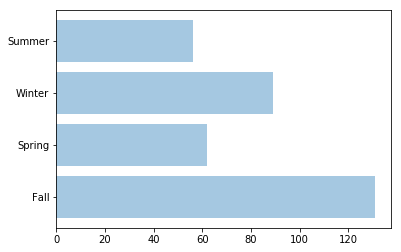

In [1291]:
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(sold_works_mapping_df['Season Sold'])

keys = counter.keys()
y_pos = np.arange(len(keys))
performance = [counter[k] for k in keys]

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, keys)

([<matplotlib.axis.YTick at 0x149d7cef0>,
 <a list of 4 Text yticklabel objects>)

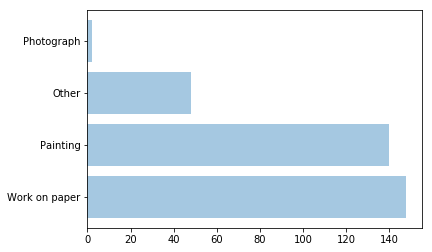

In [1292]:
counter = Counter(sold_works_mapping_df['Umbrella Medium'])

keys = counter.keys()
y_pos = np.arange(len(keys))
performance = [counter[k] for k in keys]

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, keys)

([<matplotlib.axis.YTick at 0x14a4ebd68>,
 <a list of 3 Text yticklabel objects>)

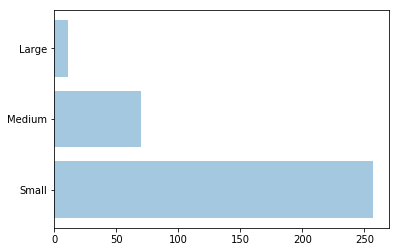

In [1293]:
counter = Counter(sold_works_mapping_df['Size of Piece'])

keys = counter.keys()
y_pos = np.arange(len(keys))
performance = [counter[k] for k in keys]

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, keys)

([<matplotlib.axis.YTick at 0x1489e5438>,
 <a list of 12 Text yticklabel objects>)

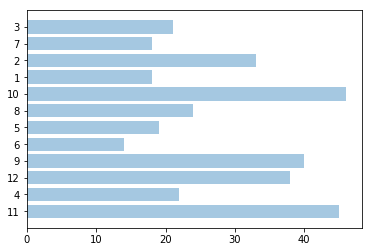

In [1294]:
counter = Counter(sold_works_mapping_df['Month Sold'])

keys = counter.keys()
y_pos = np.arange(len(keys))
performance = [counter[k] for k in keys]

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, keys)

In [1290]:
# sold_works_mapping_df['Season Sold'][sold_works_mapping_df['Season Sold'] == 18]

In [1288]:
# sold_works_mapping_df[Artist].loc[1046]

# sold_works_mapping_df = sold_works_mapping_df.drop([1046])

In [1295]:
# sold_works_mapping_df.to_csv('sold_works_df')

# Unsold works


In [1029]:
unsold_df = pd.read_csv('/Users/flatironschool/Final-Project/unsold-works-mapping.csv')

In [1030]:
unsold_df

,Artist,File Name,Title,Dimensions,Medium
0,Lorraine Glessner,UNSOLD-GlessnSentientMagnoliaTheGreatSaltLake3...,The Sentient Magnolia & The Great Salt Lake 3,30 x 40 x 1.5,"encaustic (pigmented beeswax), collage, mixed ..."
1,Lorraine Glessner,UNSOLD-GlessnTheSentientMagnoliaGreatSaltLake4...,The Sentient Magnolia & The Great Salt Lake 4,30 x 40 x 1.5,"encaustic (pigmented beeswax), collage, pyrogr..."
2,Lorraine Glessner,UNSOLD-GlessnBetweenSleepAndDreams1_24x24x1.jpg,Between Sleep and Dreams 1,24 x 24 x 1,"encaustic (pigmented beeswax), horse hair, gou..."
3,Lorraine Glessner,UNSOLD-GlessnTheSentientMagnoliaGreatSaltLake2...,The Sentient Magnolia & The Great Salt Lake 2,30 x 40 x 1.5,"encaustic (pigmented beeswax), collage, mixed ..."
4,Lorraine Glessner,UNSOLD-GlessnFlirtatiousSuperficiality36x72.jpeg,Flirtatious Superficiality (diptych),36 x 72 x 1.5,"encaustic (pigmented beeswax), horse hair, mix..."
5,Lorraine Glessner,UNSOLD-GlessnBurnBabyBurn48x48x1_5.jpg,Burn Baby Burn,48 x 48,"encaustic (pigmented beeswax), horse hair, mix..."
6,Julie Gross,UNSOLD-GrossVSH5OilonLinen64x32 copy.JPG,Vertical Sine Horizon 5,64 x 32,Oil on linen
7,Julie Gross,UNSOLD-GrossVSH6_2014OilOnLinen64x32 copy.JPG,Vertical Sine Horizon 6,64 x 32,Oil on linen
8,Julie Gross,UNSOLD-GrossStudyVSH3_24x14 copy.jpg,Vertical Sine Horizon 3',24 x 14',gouache on paper
9,Julie Gross,UNSOLD-GrossStudyVSH20_22_5x13_5 copy.jpg,Vertical Sine Horizon 20,22.5 x 13.5,gouache on paper


In [1032]:
# unsold_df.to_csv('unsold_df')

In [622]:
# matches_for_newcol = []

# for i in range(0,len(matches)):
#     if clusters_df['vgg16-file-names'][clusters_df['vgg16-file-names'].str.match(matches[i][1])].any():
#         matches_for_newcol.append(matches[i])
#     else: 
#         matches_for_newcol.append('No match')
        
# # df[df['A'].str.contains("hello")]
